In [1]:
import sys
import os
sys.path.append('c:\\Users\\nkwan\\Desktop\\school\\capstone\\code\\legume')

In [12]:
import numpy as np
import legume
import chickpea
from chickpea.cma import CavityModeAnalysis
import matplotlib.pyplot as plt
import time

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Let's initialize an H2 cavity and its base crystal, as we did in the first notebook.

In [16]:
Nx, Ny = 16, 16
supercell = [Nx, Ny]

#we can modify this to suit our needs
thickness = 0.71
eps = 12.0
rad = [0.344]
cavType = 'H'
m = 2

crystal = chickpea.pcc.pcc(cavType, rad, supercell, thickness, eps, m, 0)
phc = crystal.cavity()
base = crystal.getbase()

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

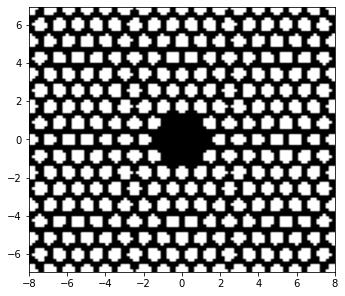

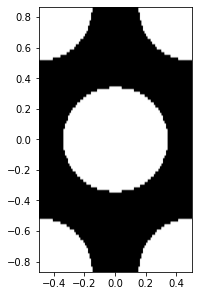

In [17]:
legume.viz.eps_xy(phc, z=thickness/2)
legume.viz.eps_xy(base, z=thickness/2, Nx=100, Ny=100)

Now, we construct the Cavity mode analysis object.

In [19]:
defectMargins = np.array([0.25, 0.25])
cma = CavityModeAnalysis(phc, base, defectMargins, layer=0, gmax=2, base_gmax=3)
#using this method places some constraints on the parameters

[[0.25995558 0.37572079 0.31783818]]
(array([3.14159265]), array([1.81379936]))
(array([4.1887902]), array([0.]))
[0.36422688]
Band gap lower bound: 0.259956.
Band gap upper bound: 0.375721.
Band gap center: 0.317838.
Gap-midgap ratio: 0.364227.
The top of the air band is at k= (3.141593, 1.813799).
The bottom of the dielectric band is at k= (4.188790, 0.000000).



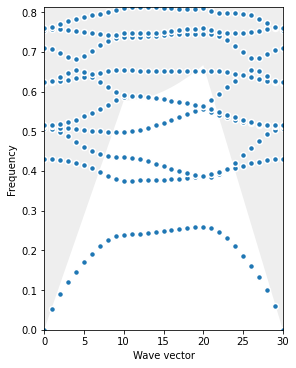

In [22]:
bandgaps, k_air, k_eps = cma.find_band_gaps(band_tol = 0.1, order=np.array([0]), trim_lc = True, lc_trim = 0.04, numeig=10)

gmg_ratio = np.array([(bandgap[1]-bandgap[0]) / bandgap[2] for bandgap in bandgaps])
legume.viz.bands(cma.base_gme, trim_light_cone = False, lc_trim = 0.04)
print(gmg_ratio)

print("Band gap lower bound: %f.\n"
      "Band gap upper bound: %f.\n"
      "Band gap center: %f.\n"
      "Gap-midgap ratio: %f.\n"
      "The top of the air band is at k= (%f, %f).\n"
      "The bottom of the dielectric band is at k= (%f, %f).\n" %  (bandgaps[0][0], bandgaps[0][1], bandgaps[0][2],
                                                                   gmg_ratio[0], k_air[0], k_air[1], k_eps[0], k_eps[1]))


In [57]:
options = {'verbose': True,
           'gmode_inds': [0],
           'gradients': 'approx',
           'eig_solver': 'eigh',
           'numeig': 260,
           'eig_sigma': bandgaps[0][2],
           'compute_im': False
}

To observe convergence with gmax, we require a large enough supercell. Internally in Legume, gmax is scaled by 2\pi and truncated to an integer. So, our input into gmax doesn't need to be an integer.

In [61]:
gmax_low = 1.
gmax_high = 2.4
stepsize = 1.001/(2*np.pi)
gmax_array = np.arange(gmax_low, gmax_high, stepsize)
kpoints = np.array([[k_air[0][0]], [k_air[1][0]]])

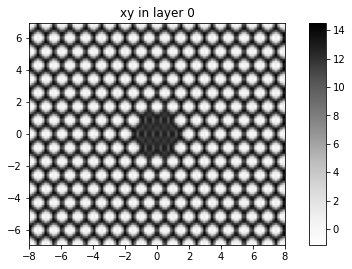

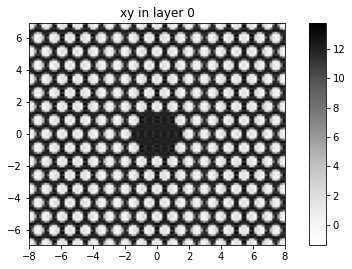

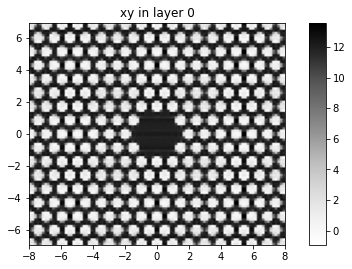

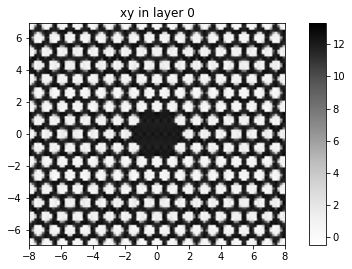

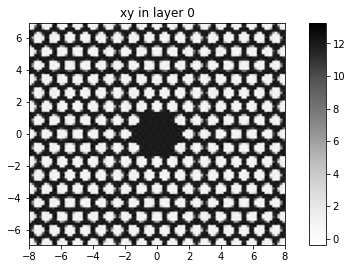

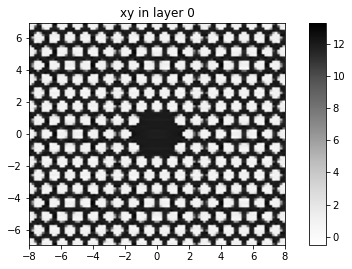

In [64]:
viz_array = range(1, 7)
for gmax in viz_array:
    gme = legume.GuidedModeExp(phc, gmax)
    legume.viz.eps_ft(gme, figsize=5)

'\nplt.plot(gmax_array, q_list)\nplt.show()\n'

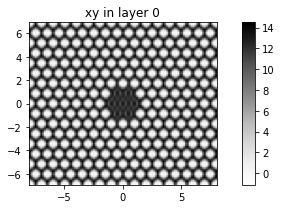

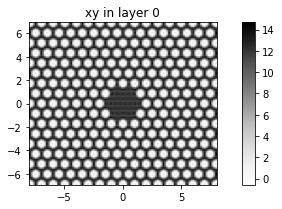

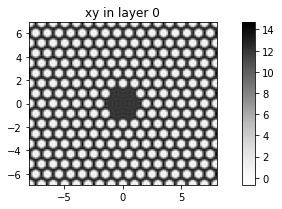

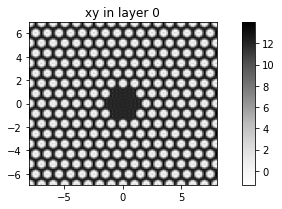

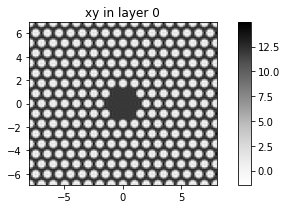

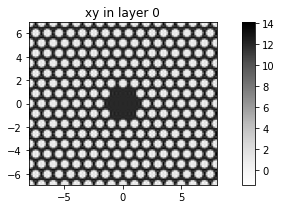

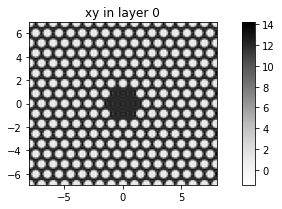

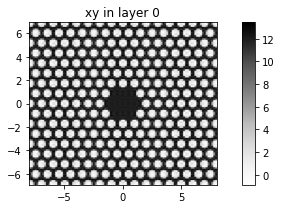

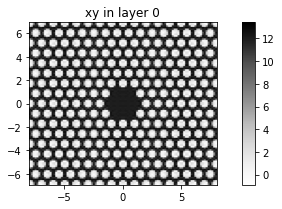

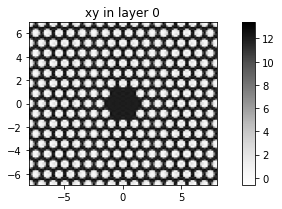

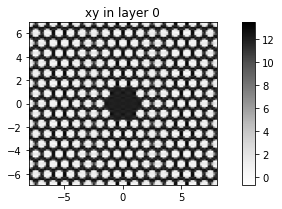

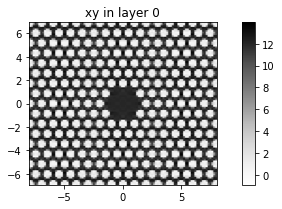

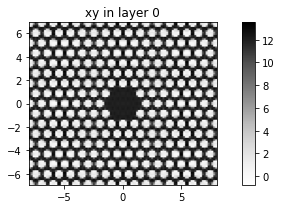

In [63]:
q_list = []
for gmax in gmax_array:
    gme = legume.GuidedModeExp(phc, gmax)
    gme.run(kpoints=kpoints, **options)
    freq_im, _, _ = gme.compute_rad(0, [supercell[0]*supercell[1]])
    q_list.append(gme.freqs[0, supercell[0]*supercell[1]]/2/freq_im[0])


plt.plot(gmax_array, q_list)
plt.show()
